In [23]:
# Fixing Skewness BEFORE Outlier Handling 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Uploading imputed data to df from CSV WorkingDataFrame
df = pd.read_csv('WorkingDataFrame', index_col=0)

In [4]:
target = df.iloc[:,:7]
target2 = df.iloc[:,22:24]
targets = pd.concat([target, target2], axis=1, join_axes=[df.index])
df = df.drop(['I1','I2','I3','P_IPO','P_H','P_L','P_1DAY','Y1','Y2'], axis=1)
df.head(15)

,C1,C2,C4,C7,T1,T2,T3,T4,T5,S1,S2,S3,C3',C5',C6'
0,122.0,1.0,0.029074,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,1,3.864345,11.111111
1,259.0,0.0,-0.013352,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,0,12.028832,0.000000
2,90.0,1.0,0.020715,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,0,3.369134,0.000000
3,209.0,1.0,0.020023,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,0,3.299697,0.000000
4,80.0,1.0,-0.034895,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,1,3.726269,5.000000
5,94.0,1.0,-0.057556,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0,1,5.724394,0.000000
6,128.0,1.0,0.004106,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0,0,3.463095,0.000000
7,91.0,0.0,0.040620,103.833,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0,0,2.421469,0.000000
8,100.0,1.0,-0.029316,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0,0,4.816591,0.000000
9,106.0,1.0,-0.024925,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0,1,3.056608,0.000000


In [5]:
# Checking Skew of DataFrame
df.skew() 
# Skipping C2 and C3' because they are binary 
# Skipping C4 because already skewed properly

C1      5.747573
C2     -2.123926
C4     -0.491134
C7     12.348960
T1      1.740888
T2      1.640243
T3      1.617719
T4      1.420602
T5     12.772389
S1      2.312775
S2      3.737864
S3      3.440281
C3'    -0.117764
C5'    10.648354
C6'     4.396060
dtype: float64

(array([ 11.,   9.,  22., 121., 327., 120.,  40.,  25.,   4.,   3.]),
 array([1.        , 1.23195224, 1.46390449, 1.69585673, 1.92780898,
        2.15976122, 2.39171347, 2.62366571, 2.85561796, 3.0875702 ,
        3.31952245]),
 <a list of 10 Patch objects>)

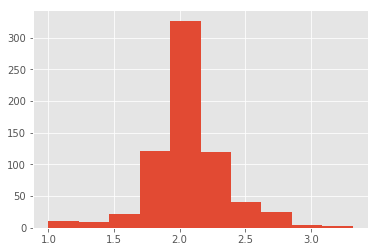

In [6]:
# Fixing Positive Skew of C1
df['C1'] = np.log10(df['C1'])
plt.hist(df['C1'])

(array([  6.,  12.,  22.,  36., 111., 258., 144.,  65.,  24.,   4.]),
 array([-1.13076828, -0.56900167, -0.00723506,  0.55453155,  1.11629816,
         1.67806477,  2.23983138,  2.80159799,  3.3633646 ,  3.92513121,
         4.48689782]),
 <a list of 10 Patch objects>)

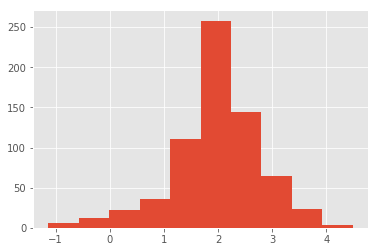

In [7]:
# Fixing Positive Skew of C7
df['C7'] = np.log10(df['C7'])
# Leaving as Moderatly Skewed 
plt.hist(df['C7'])

(array([ 13.,  54., 130., 215., 177.,  67.,  17.,   4.,   3.,   2.]),
 array([ 5.09164337,  5.78755016,  6.48345696,  7.17936376,  7.87527055,
         8.57117735,  9.26708414,  9.96299094, 10.65889773, 11.35480453,
        12.05071132]),
 <a list of 10 Patch objects>)

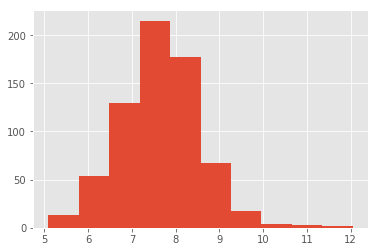

In [8]:
# Fixing Positive Skew of T1
df['T1'] = np.cbrt(df['T1'])
plt.hist(df['T1'])

(array([  2.,   1.,   9.,  90., 251., 230.,  78.,  16.,   2.,   3.]),
 array([  0.        ,  22.14858912,  44.29717824,  66.44576736,
         88.59435648, 110.7429456 , 132.89153472, 155.04012384,
        177.18871296, 199.33730208, 221.4858912 ]),
 <a list of 10 Patch objects>)

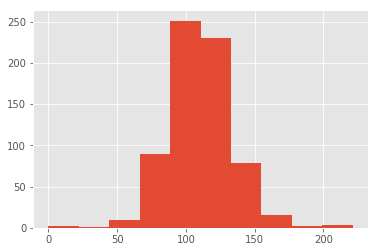

In [9]:
# Fixing Positive Skew of T1
df['T2'] = np.sqrt(df['T2'])
plt.hist(df['T2'])

(array([  3.,   0.,   8.,  92., 252., 232.,  75.,  15.,   2.,   3.]),
 array([  0.        ,  20.96473229,  41.92946458,  62.89419687,
         83.85892916, 104.82366145, 125.78839374, 146.75312603,
        167.71785832, 188.68259061, 209.6473229 ]),
 <a list of 10 Patch objects>)

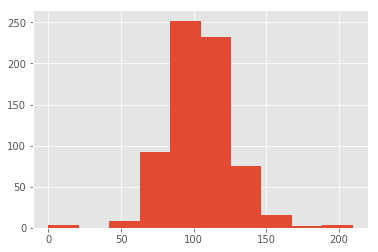

In [10]:
# Fixing Positive Skew of T3
df['T3'] = np.sqrt(df['T3'])
plt.hist(df['T3'])

(array([  2.,   0.,   6.,  74., 217., 259.,  95.,  22.,   4.,   3.]),
 array([ 0.        ,  3.25269119,  6.50538239,  9.75807358, 13.01076477,
        16.26345597, 19.51614716, 22.76883835, 26.02152955, 29.27422074,
        32.52691193]),
 <a list of 10 Patch objects>)

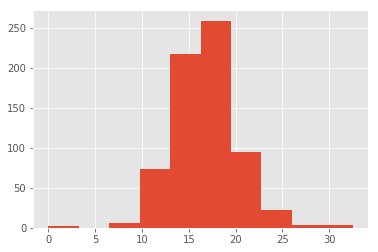

In [11]:
# Fixing Positive Skew of T4
df['T4'] = np.sqrt(df['T4'])
plt.hist(df['T4'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 10.,  78., 196., 267., 111.,  14.,   4.,   0.,   0.,   1.]),
 array([2.22271647, 2.40163146, 2.58054645, 2.75946144, 2.93837643,
        3.11729141, 3.2962064 , 3.47512139, 3.65403638, 3.83295137,
        4.01186636]),
 <a list of 10 Patch objects>)

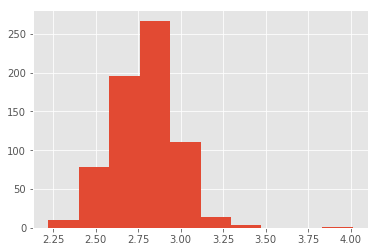

In [12]:
# Fixing Positive Skew of T5
df['T5'] = np.log10(df['T5'])
plt.hist(df['T5'])

(array([  1.,   0.,   0.,   2.,  26., 182., 314., 135.,  14.,   8.]),
 array([-1.        , -0.22393857,  0.55212286,  1.32818429,  2.10424572,
         2.88030715,  3.65636858,  4.43243001,  5.20849144,  5.98455287,
         6.7606143 ]),
 <a list of 10 Patch objects>)

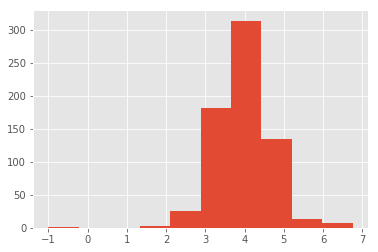

In [13]:
# Fixing Positive Skew of S1
df['S1'] = np.cbrt(df['S1'])
plt.hist(df['S1'])

(array([  8.,  31.,  84., 183., 192., 120.,  42.,  14.,   5.,   3.]),
 array([1.30103   , 1.4684242 , 1.6358184 , 1.8032126 , 1.9706068 ,
        2.13800099, 2.30539519, 2.47278939, 2.64018359, 2.80757779,
        2.97497199]),
 <a list of 10 Patch objects>)

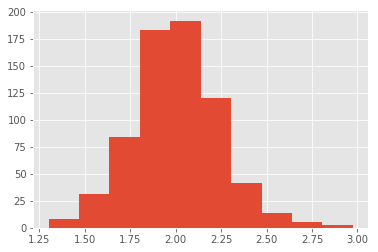

In [14]:
# Fixing Positive Skew of S2
df['S2'] = np.log10(df['S2'])
plt.hist(df['S2'])

(array([  1.,   8.,  43., 150., 218., 191.,  57.,  11.,   1.,   2.]),
 array([1.41497335, 1.56807208, 1.72117082, 1.87426955, 2.02736829,
        2.18046703, 2.33356576, 2.4866645 , 2.63976323, 2.79286197,
        2.9459607 ]),
 <a list of 10 Patch objects>)

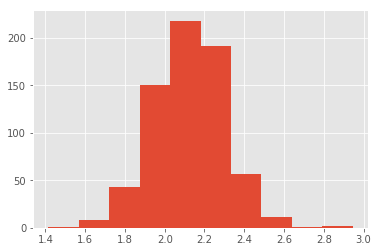

In [15]:
# Fixing Positive Skew of S3
df['S3'] = np.log10(df['S3'])
plt.hist(df['S3'])

(array([  3.,   2.,  20., 168., 362., 102.,  18.,   2.,   1.,   4.]),
 array([-0.5478714 , -0.29317675, -0.0384821 ,  0.21621255,  0.47090719,
         0.72560184,  0.98029649,  1.23499113,  1.48968578,  1.74438043,
         1.99907508]),
 <a list of 10 Patch objects>)

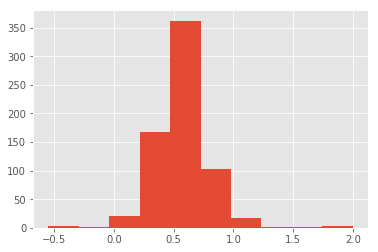

In [16]:
# Fixing Positive Skew of C5'
df["C5'"] = np.log10(df["C5'"])
plt.hist(df["C5'"])

(array([427.,   0.,   0.,   0.,   0.,   0.,  13., 159.,  72.,  11.]),
 array([0.        , 0.16681005, 0.33362011, 0.50043016, 0.66724021,
        0.83405027, 1.00086032, 1.16767038, 1.33448043, 1.50129048,
        1.66810054]),
 <a list of 10 Patch objects>)

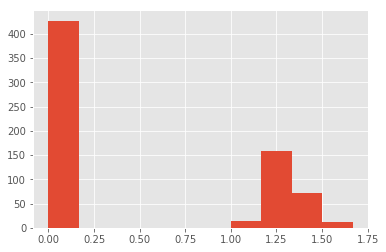

In [17]:
# Fixing Positive Skew of C6'
df["C6'"] = np.cbrt(np.cbrt(df["C6'"]))
plt.hist(df["C6'"])

In [18]:
# Checking Skew of DataFrame
df.skew()

C1     0.146560
C2    -2.123926
C4    -0.491134
C7    -0.640897
T1     0.384746
T2     0.259836
T3     0.170438
T4     0.186136
T5     0.424152
S1     0.025788
S2     0.257575
S3     0.092696
C3'   -0.117764
C5'    0.825354
C6'    0.551889
dtype: float64

In [19]:
# Exporting DataFrame as CSV 
df.to_csv('SkewDF1', ',')

In [22]:
targets = targets.drop(["C5'", "C6'"])

KeyError: '["C5\'" "C6\'"] not found in axis'

In [20]:
targets.to_csv('Targets', ',')